In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [4]:
xTrain = pd.read_csv('input_train__fppJZ22.csv')
yTrain = pd.read_csv('y_train_CGZ7jXu.csv')

In [5]:
xTrain.head()

,id,cluster,day,asset,md,bc,ret_1,ret_2,ret_3,ret_4,...,ret_14,ret_15,ret_16,ret_17,ret_18,ret_19,ret_20,ret_21,ret_22,ret_23
0,0,0,17,10,-5.734573,0.125855,-0.002060,0.005848,-0.002736,-0.005487,...,NaN,-0.000339,0.001018,-0.002372,-0.000340,-0.000680,-0.007140,0.006849,0.002041,-0.001697
1,1,0,0,13,-5.813696,0.418711,-0.042280,-0.009460,-0.005173,-0.006000,...,0.004107,-0.005726,0.006993,-0.003268,0.015574,-0.010492,0.004486,0.011368,0.001606,0.000401
2,2,0,20,12,-5.814399,0.500111,0.003665,-0.010841,0.007557,0.004981,...,-0.000113,-0.000170,-0.002833,-0.007442,-0.001832,-0.005677,-0.007093,0.001626,0.004349,-0.004677
3,3,0,19,12,-5.814399,0.500111,-0.018364,0.003789,0.011795,0.016029,...,0.005604,-0.009794,-0.001023,-0.002959,0.002568,-0.005579,0.001317,-0.010005,0.004677,-0.004196
4,4,0,18,12,-5.814399,0.500111,-0.001589,0.011711,-0.010507,-0.002555,...,0.002530,-0.018505,-0.010855,0.002022,0.001211,-0.002648,0.001559,-0.001153,0.000635,0.001961


In [ ]:
xTrain['sample_id'] = XTrain['cluster'] * 21

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 2s 5ms/step - loss: 0.0784
Epoch 2/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0248
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0169
Epoch 4/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0134
Epoch 5/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0128
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0073
Epoch 7/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0053
Epoch 8/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0056
Epoch 9/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0047
Epoch 10/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0040
Epoch 11/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0034
Epoch 12/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0035
Epoch 13/50
144/144 [====

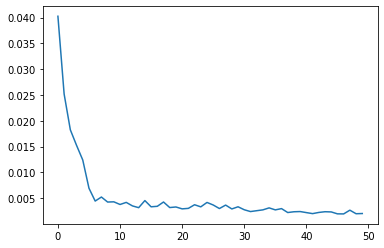

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.6046513]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.6046513], dtype=float32),
 array([0.5854211], dtype=float32),
 array([0.7456695], dtype=float32),
 array([0.8121553], dtype=float32),
 array([0.911981], dtype=float32),
 array([0.8914289], dtype=float32),
 array([0.8224216], dtype=float32),
 array([0.7289473], dtype=float32),
 array([0.6303051], dtype=float32),
 array([0.59199744], dtype=float32),
 array([0.54971915], dtype=float32),
 array([0.5722453], dtype=float32)]

In [ ]:
test.head()

,Production,Predictions
Date,,
1975-01-01,834,813.303572
1975-02-01,782,809.682804
1975-03-01,892,879.037941
1975-04-01,903,912.407272
1975-05-01,966,954.157072


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

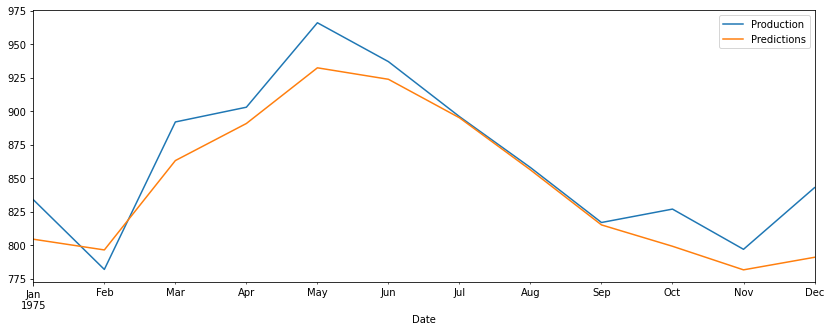

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

24.270639050894633
